In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nitinchoudhary012/algerian-forest-fires-dataset")

print("Path to dataset files:", path)

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 4.76k/4.76k [00:00<00:00, 4.83MB/s]

Extracting files...
Path to dataset files: C:\Users\Ojshav\.cache\kagglehub\datasets\nitinchoudhary012\algerian-forest-fires-dataset\versions\2


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Dataset\Algerian_forest_fires_dataset.csv")

In [3]:

df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
df.describe

<bound method NDFrame.describe of     day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0     1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1     2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2     3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3     4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4     5     6  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
242  26     9  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
243  27     9  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
244  28     9  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
245  29     9  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
246  30     9  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
0    0.5   not f

## Data Cleaning

In [5]:
df[df.isnull().any(axis  =1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [6]:
df['Region'] = 0  # Set default value to 0 for all rows
df.loc[122:, 'Region'] = 1  # Set value to 1 for rows from index 122 onward


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       247 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.1+ KB


In [8]:
df[["Region"]] = df[["Region"]].astype(int)

In [9]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [10]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [11]:

df = df.dropna().reset_index(drop=True)


In [12]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [13]:
## remove the 122nd row
df = df.drop(122).reset_index(drop=True)

In [14]:
df[df.isnull().any(axis  =1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [16]:
## fix spaces in column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [17]:
## change the required as integer datatypes
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [18]:
df[['month','day','year','Temperature','RH','Ws']] =  df[['month','day','year','Temperature','RH','Ws']] .astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [20]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [21]:
## changing the other colums to float datatype
objects = [features for features in df.columns if df[features].dtypes =='O']
    
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [22]:
for i in objects:
    if i!= 'Classes':
        df[i] = df[i].astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [24]:
## let save the cleaned dataset
df.to_csv("Dataset\Algerian_forest_fires_dataset_cleaned.csv",index=False)

In [25]:
df2 = pd.read_csv("Dataset\Algerian_forest_fires_dataset_cleaned.csv")

In [26]:
df2.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


## Exploratory Data Analysis(EDA)

In [27]:
df_copy = df2.copy()

In [28]:
df_copy = df2.drop(['day','month','year'],axis=1)

In [29]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [30]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [31]:
## encode the categories in classes
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [32]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [33]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

C:\Users\Ojshav\AppData\Local\Temp\ipykernel_10516\4169799723.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


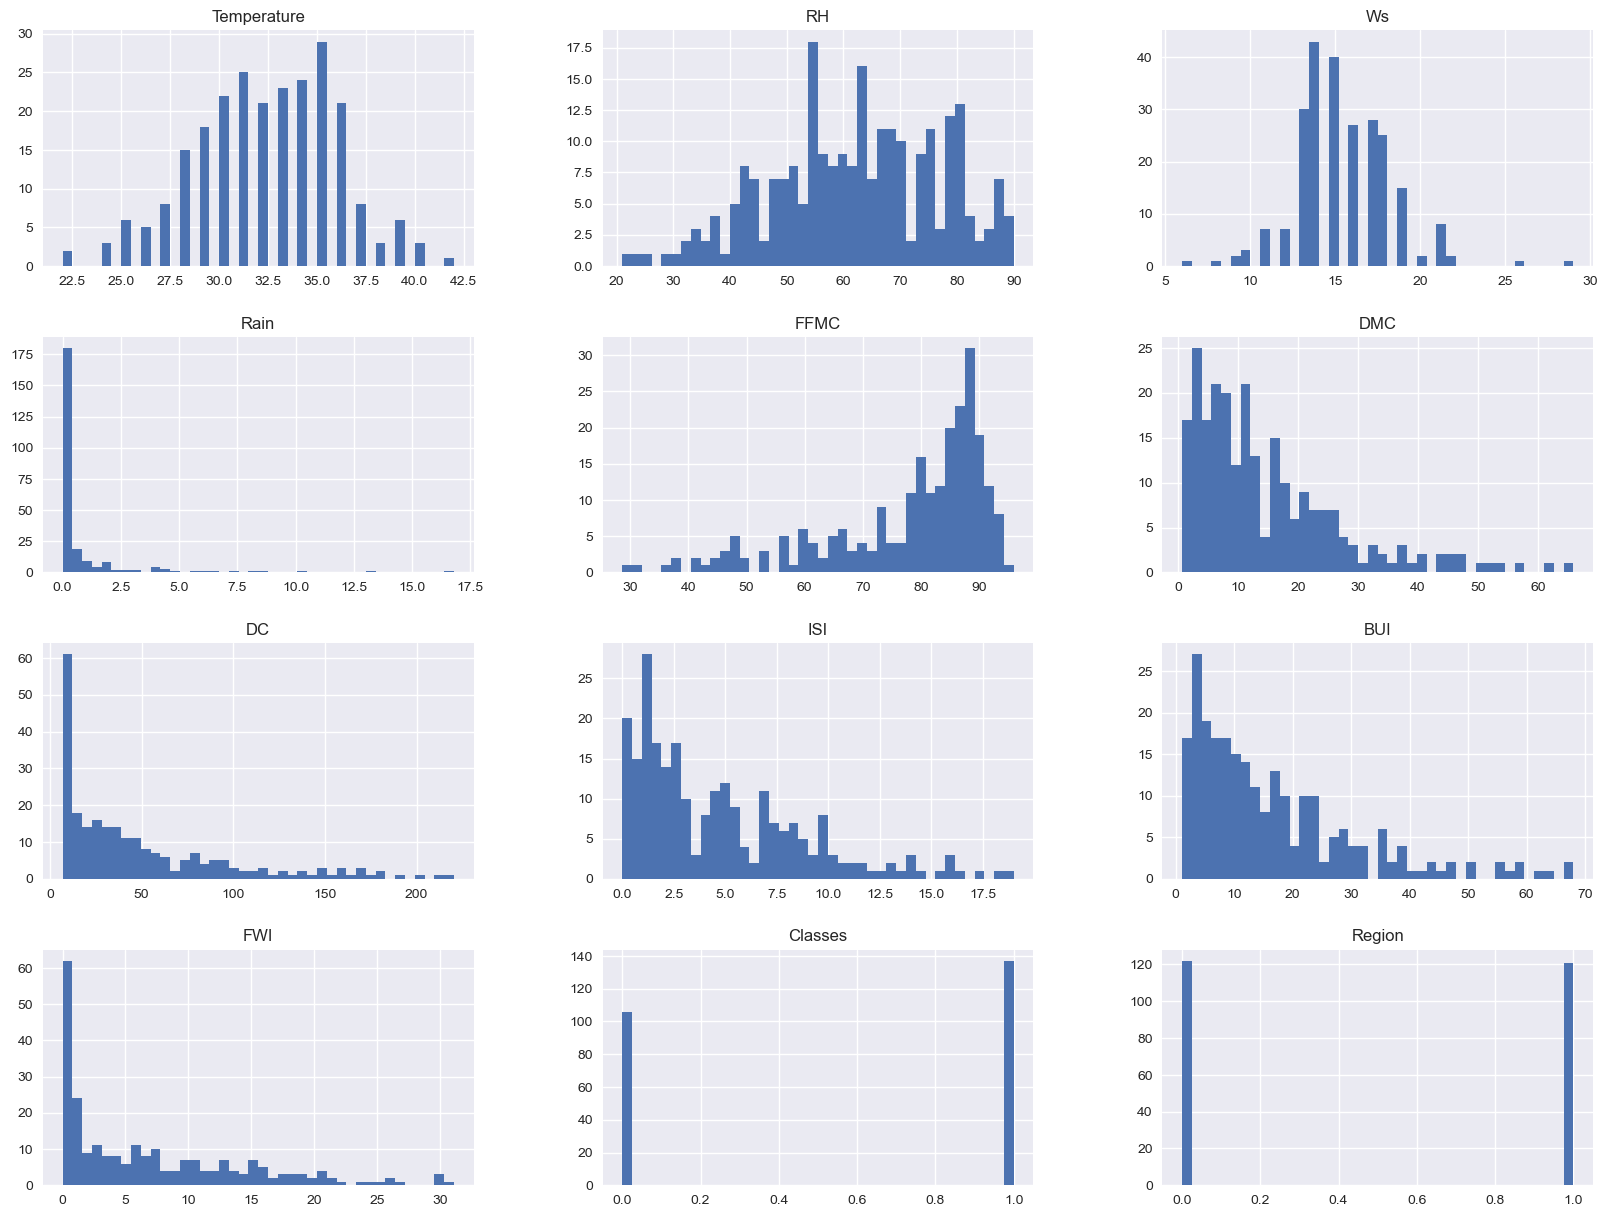

In [34]:
## plot density plot for all the features
plt.style.use('seaborn')
df_copy.hist(bins = 40, figsize=(20,15))
plt.show()

In [35]:
## precentage for pie charts
df_copy['Classes'].value_counts(normalize=True)

Classes
1    0.563786
0    0.436214
Name: proportion, dtype: float64

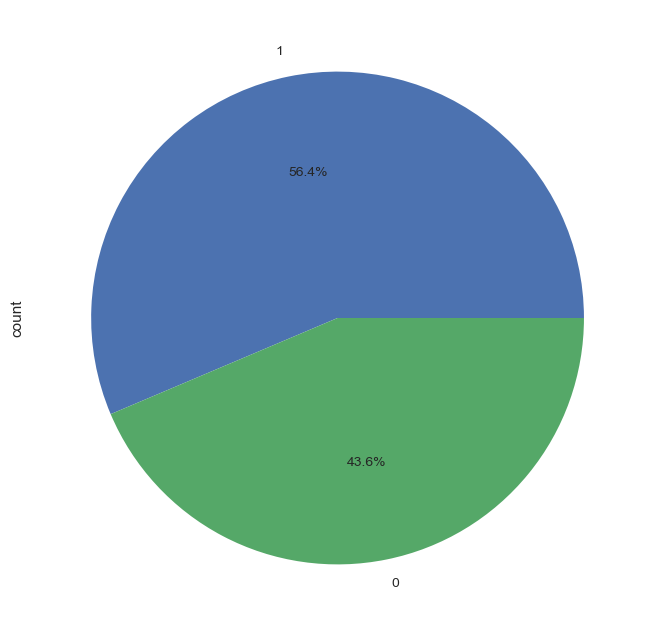

In [36]:
## plot pie chart for classes
plt.figure(figsize=(8,8))
df_copy['Classes'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [37]:
import seaborn as sns

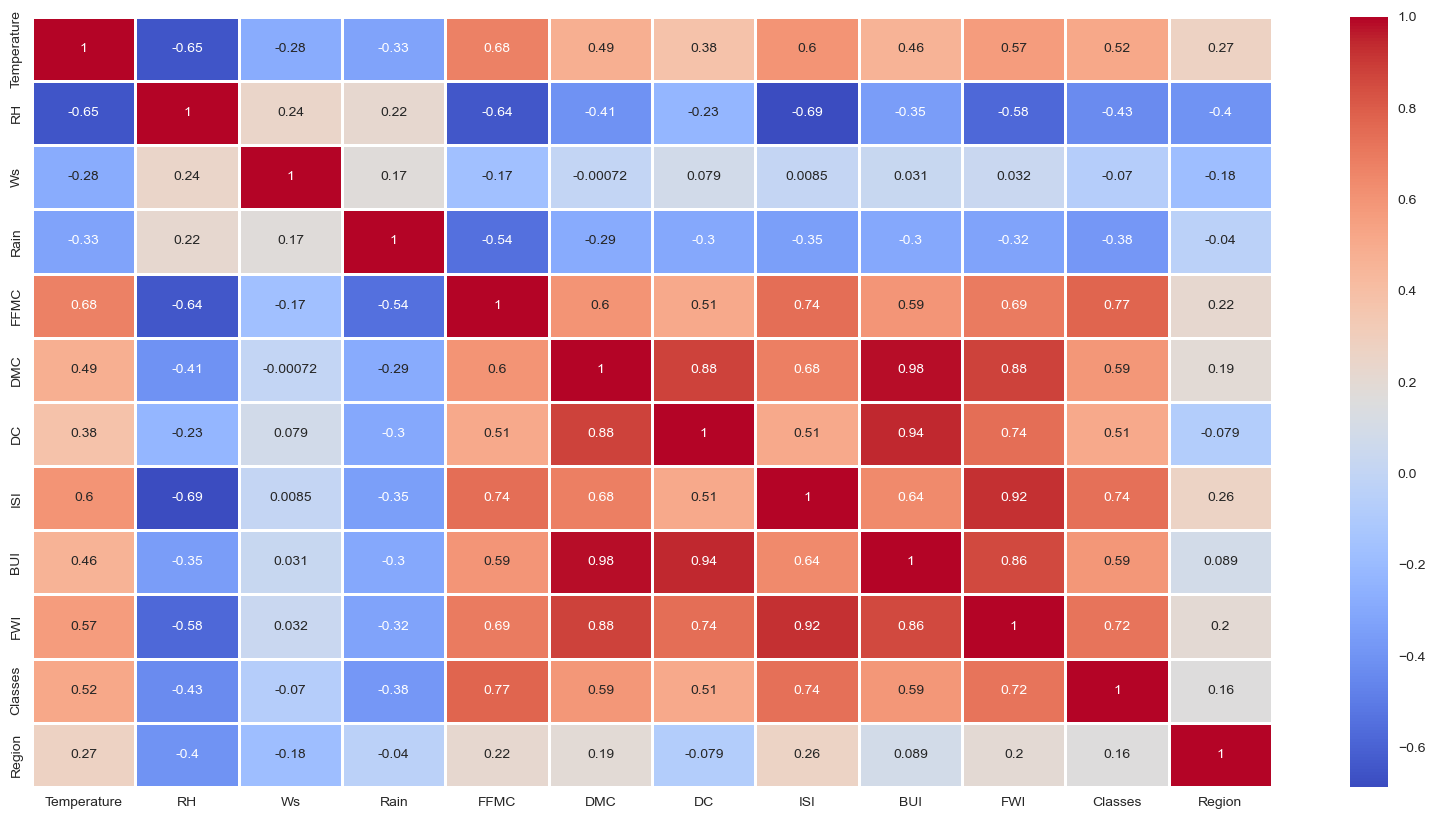

In [38]:
## correlaation
df_copy.corr()
# correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(df_copy.corr(),annot=True,cmap='coolwarm',linewidths=1)
plt.show()

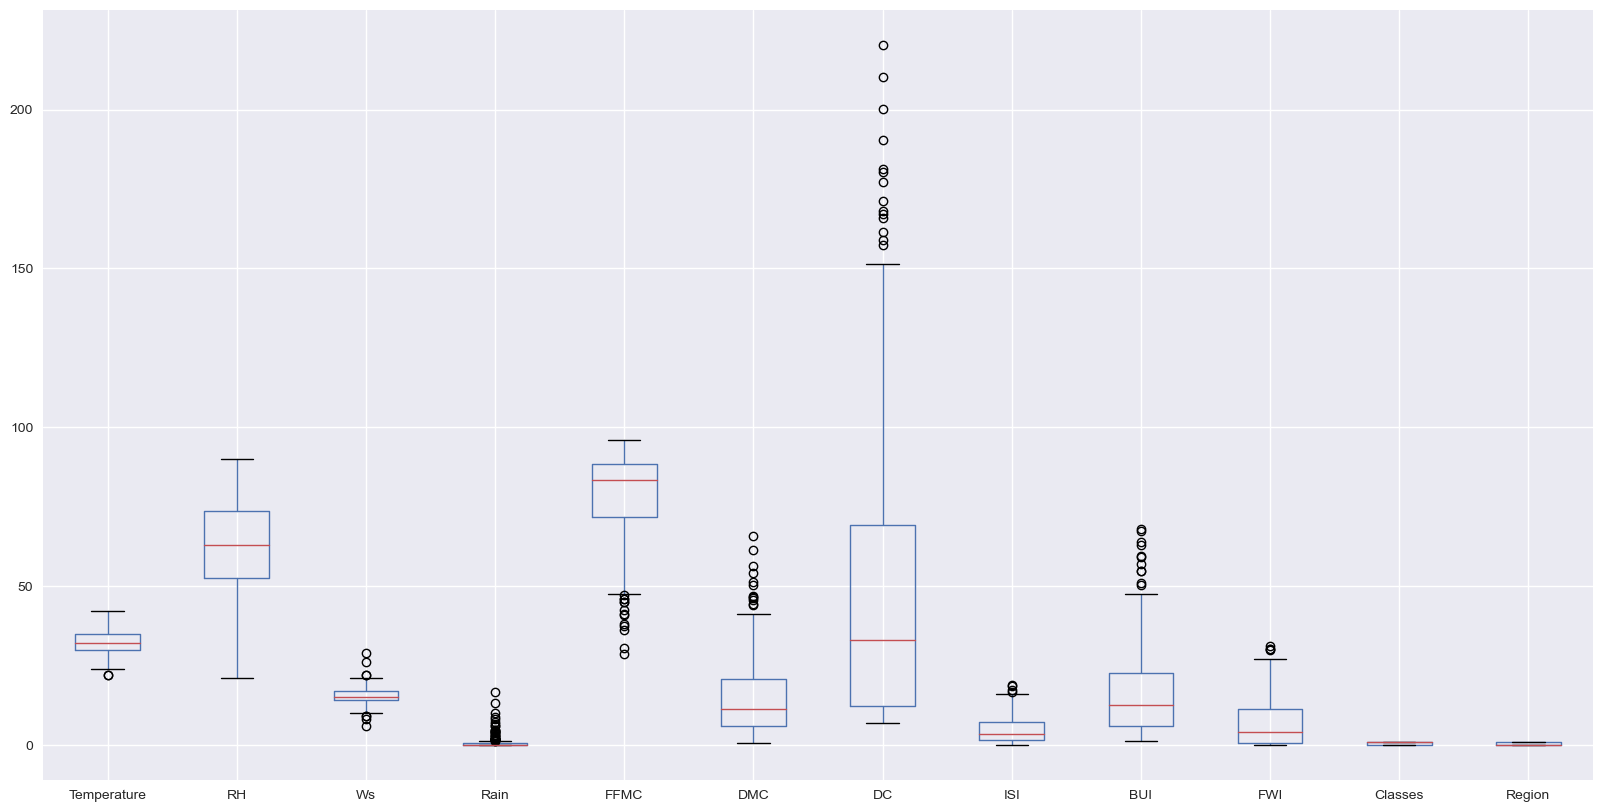

In [39]:
## box plots
plt.figure(figsize=(20,10))
df_copy.boxplot()
plt.show()

In [40]:
## encode the categories in classes
df2['Classes'] = np.where(df2['Classes'].str.contains('not fire'),'not fire','fire')

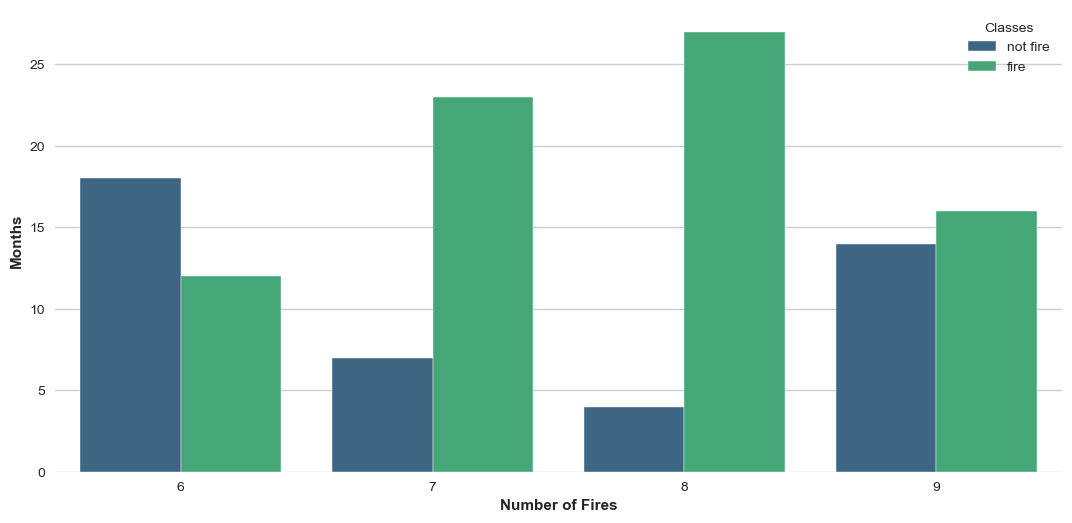

In [41]:
# Filter the DataFrame for Region 1
dftemp = df2.loc[df_copy['Region'] == 1]

# Set up the figure size and styling
plt.figure(figsize=(13, 6))
sns.set_style('whitegrid')

# Plot the count of fires per month, colored by 'Classes'
sns.countplot(x='month', data=dftemp, hue='Classes', palette='viridis')
plt.xlabel('Number of Fires',weight  = 'bold')
plt.ylabel('Months',weight = 'bold')
plt.show()


## Featire Selection

In [42]:
## Independent and Dependent Features
X = df_copy.drop('FWI',axis=1)
y = df['FWI']

In [43]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [44]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [45]:
## Train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
X_train.shape , X_test.shape


((182, 11), (61, 11))

In [47]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

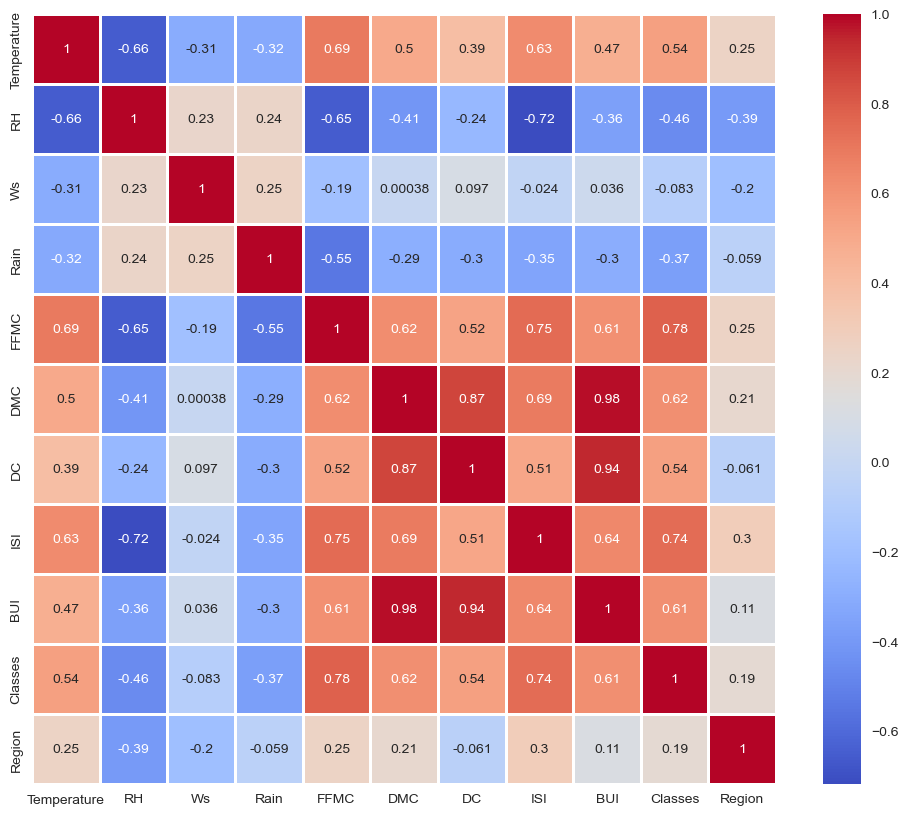

In [48]:
## check for multicollenarity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=1)

In [49]:
def correlation(dataset,thresold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > thresold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [50]:
## threshold - domain  Expertise
correlation(X_train,0.85)

{'BUI', 'DC'}

In [51]:
## drop feature greather than threshold
X_train = X_train.drop(['DMC','DC'],axis=1)
X_test = X_test.drop(['DMC','DC'],axis=1)

## Feature Scaling or Standardization

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_Sc = sc.fit_transform(X_train)
X_test_Sc = sc.transform(X_test)


In [53]:
X_train_Sc


array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.77269802,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.90344718,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  0.38339978,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.03419633,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.18383528,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.99290713,
        -1.10431526, -0.98907071]])

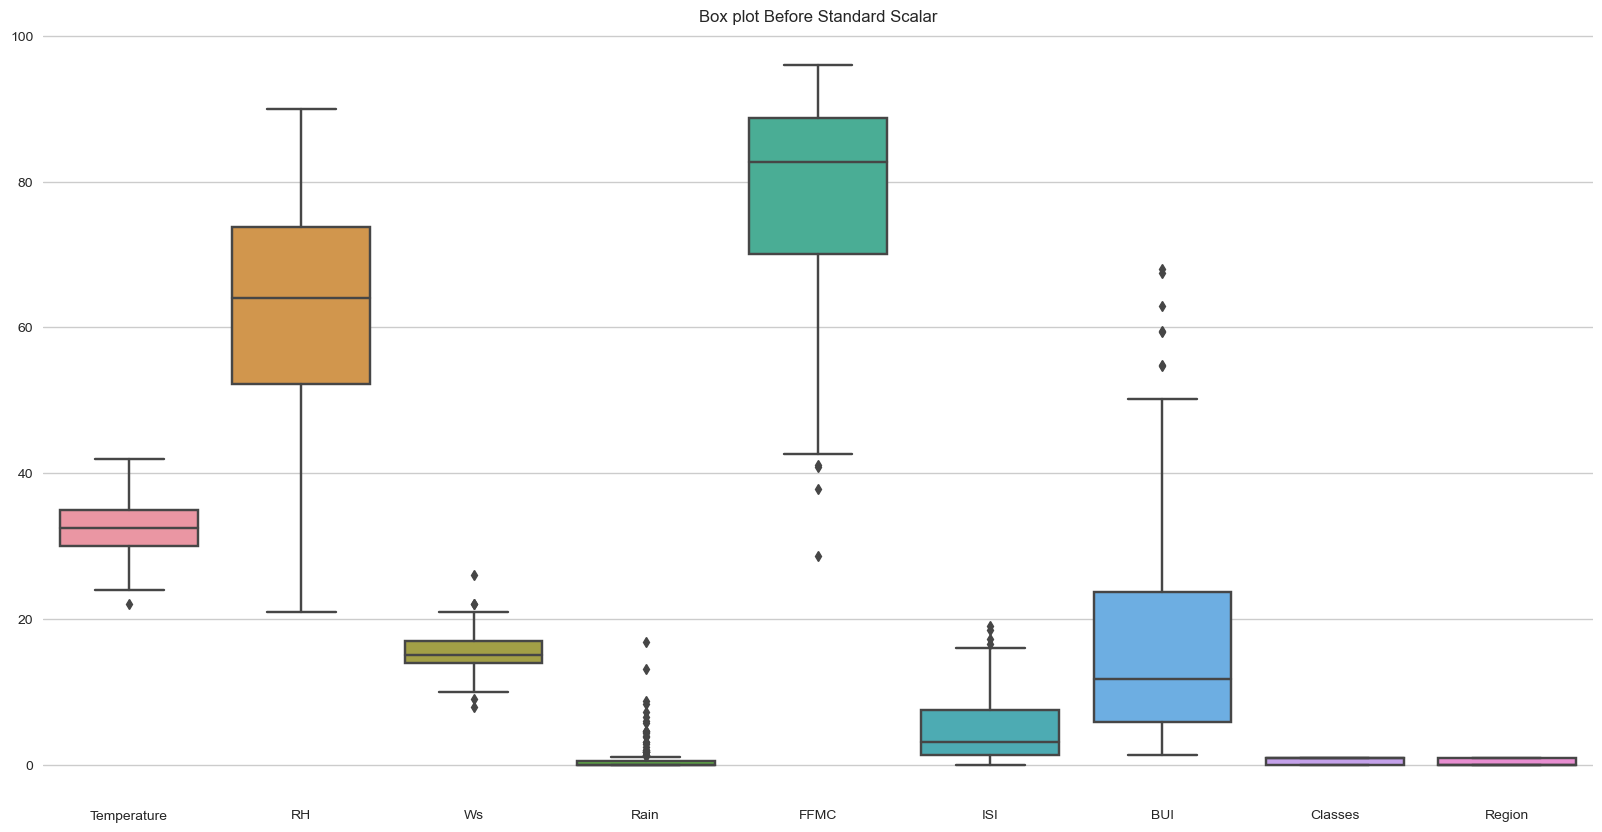

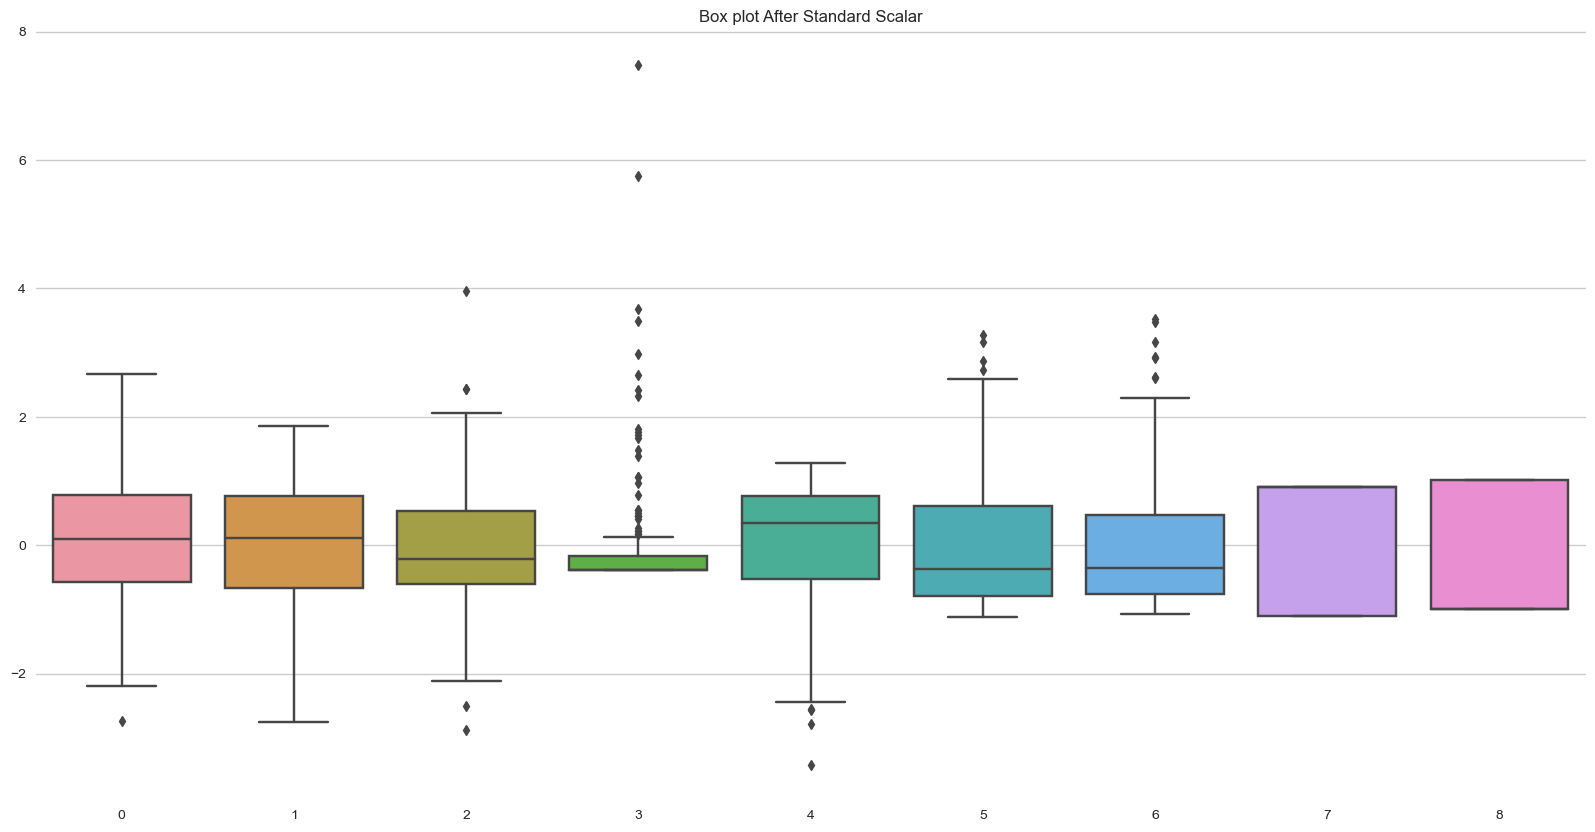

In [54]:
## Box plot to understand the effect on standard scalar
plt.figure(figsize=(20,10))
sns.boxplot(data = X_train)
plt.title('Box plot Before Standard Scalar')
plt.show()

plt.figure(figsize=(20,10))
sns.boxplot(data = X_train_Sc)
plt.title('Box plot After Standard Scalar')
plt.show()



## MOdel building

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train_Sc,y_train)
y_pred = lr.predict(X_test_Sc)
mae = mean_absolute_error(y_test,y_pred)
r2_score  = r2_score(y_test,y_pred)

print("Mean Squared Error: ", mae)
print("R2 Score: ", r2_score)



Mean Squared Error:  0.47398935407627407
R2 Score:  0.9885461787936622


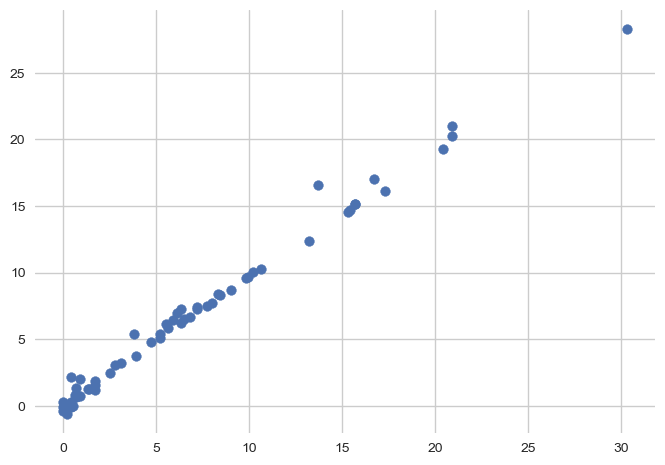

In [56]:
plt.scatter(y_test,y_pred)

In [57]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and fit the Lasso model
lasso = Lasso()
lasso.fit(X_train_Sc, y_train)

# Make predictions on the test set
y_pred = lasso.predict(X_test_Sc)

# Calculate Mean Absolute Error and R2 Score
mae_lasso = mean_absolute_error(y_test, y_pred)
r2_score_lasso = r2_score(y_test, y_pred)

# Print the results
print("Mean Absolute Error: ", mae_lasso)
print("R2 Score: ", r2_score_lasso)


Mean Absolute Error:  1.0405718849125525
R2 Score:  0.9558984658448342


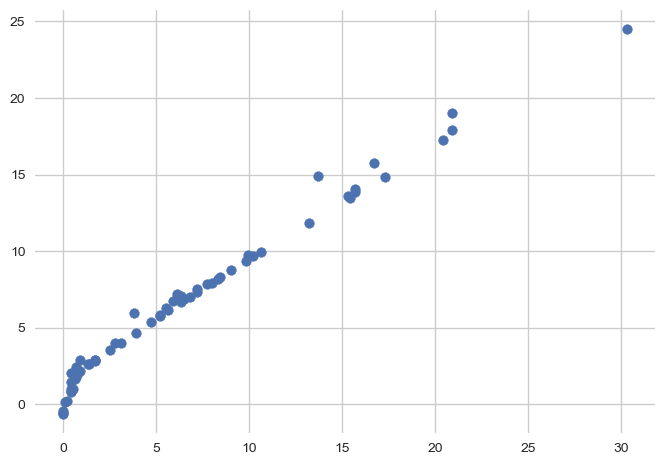

In [58]:
plt.scatter(y_test,y_pred)

## cross-validation Lasso


In [59]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_Sc,y_train)
y_pred = lassocv.predict(X_test_Sc)
mae = mean_absolute_error(y_test,y_pred)
r2_score = r2_score(y_test,y_pred)

print("Mean Squared Error: ", mae)
print("R2 Score: ", r2_score)



Mean Squared Error:  0.513067480742057
R2 Score:  0.9868198701992462


In [60]:
lassocv.alpha_

0.06582808719529475

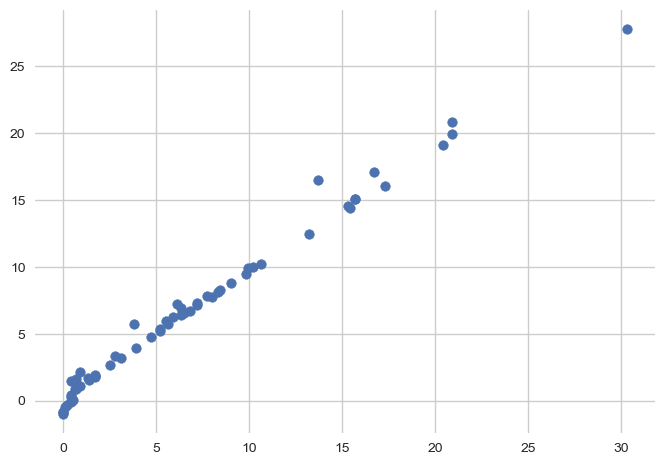

In [61]:
plt.scatter(y_test,y_pred)

In [62]:
##Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Initialize and fit the Ridge model
ridge = Ridge()
ridge.fit(X_train_Sc, y_train)

# Make predictions on the test set
y_pred = ridge.predict(X_test_Sc)


# Calculate Mean Absolute Error and R2 Score
mae_ridge = mean_absolute_error(y_test, y_pred)
r2_score_ridge = r2_score(y_test, y_pred)

# Print the results
print("Mean Absolute Error: ", mae_ridge)
print("R2 Score: ", r2_score_ridge)

Mean Absolute Error:  0.4831648138299027
R2 Score:  0.9881863986620123


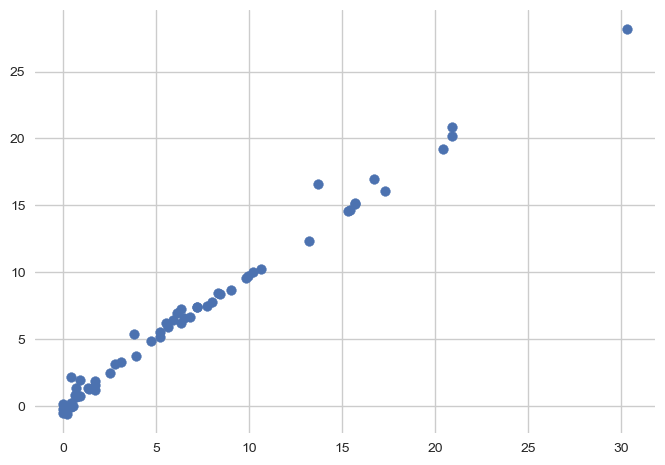

In [63]:
plt.scatter(y_test,y_pred)

In [64]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train_Sc,y_train)
y_pred = ridgecv.predict(X_test_Sc)
mae = mean_absolute_error(y_test,y_pred)
r2_score_rcv = r2_score(y_test,y_pred)


print("Mean Squared Error: ", mae)
print("R2 Score: ", r2_score_rcv)



Mean Squared Error:  0.4831648138299027
R2 Score:  0.9881863986620123


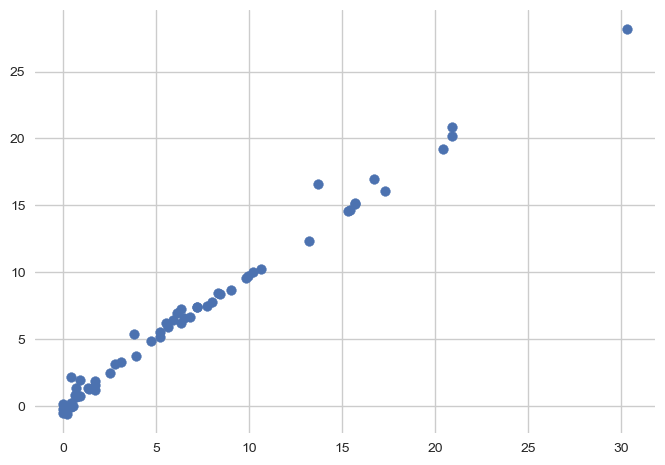

In [65]:
plt.scatter(y_test,y_pred)

In [66]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

In [67]:
## Elastic Net
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error


# Initialize and fit the ElasticNet model
elastic = ElasticNet()
elastic.fit(X_train_Sc, y_train)


# Make predictions on the test set
y_pred = elastic.predict(X_test_Sc)


# Calculate Mean Absolute Error and R2 Score
mae_elastic = mean_absolute_error(y_test, y_pred)
r2_score_elastic = r2_score(y_test, y_pred)


# Print the results
print("Mean Absolute Error: ", mae_elastic)
print("R2 Score: ", r2_score_elastic)



Mean Absolute Error:  1.8346234891165254
R2 Score:  0.8778093743119115


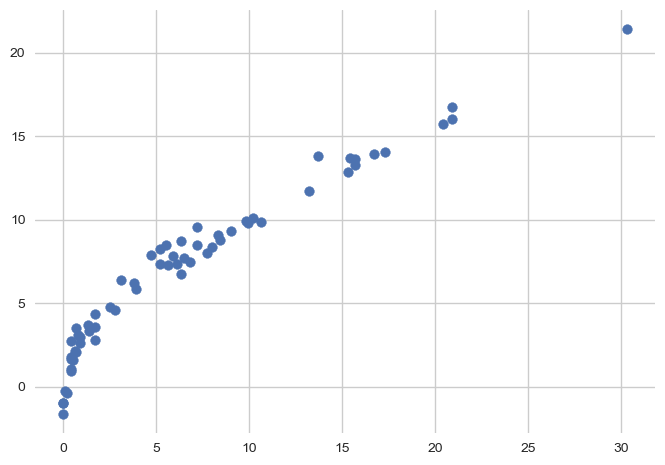

In [68]:
plt.scatter(y_test,y_pred)

In [70]:
## Pickle the model,preprocessing model standard scalar
sc



StandardScaler()

In [71]:
ridge

Ridge()

In [73]:
import pickle
pickle.dump(sc,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))